### Advanced-House-Price-Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)
TARGET = 'SalePrice'

In [2]:
dataset=pd.read_csv('train.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Missing Values

In [3]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

Alley: 0.9377% missing values
MasVnrType: 0.0055% missing values
BsmtQual: 0.0253% missing values
BsmtCond: 0.0253% missing values
BsmtExposure: 0.026% missing values
BsmtFinType1: 0.0253% missing values
BsmtFinType2: 0.026% missing values
FireplaceQu: 0.4726% missing values
GarageType: 0.0555% missing values
GarageFinish: 0.0555% missing values
GarageQual: 0.0555% missing values
GarageCond: 0.0555% missing values
PoolQC: 0.9952% missing values
Fence: 0.8075% missing values
MiscFeature: 0.963% missing values


### CHecking null values in numerical features

In [4]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean(),4)))

LotFrontage: 0.1774% missing value
MasVnrArea: 0.0055% missing value
GarageYrBlt: 0.0555% missing value


In [5]:
## Replacing the numerical Missing Values

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=dataset[feature].median()
    
    ## create a new feature to capture nan values
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)
    
dataset[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

### Checking Number of numerical features

In [6]:
numerical_feature =[feature for feature in dataset.columns if dataset[feature].dtypes!='O']
len(numerical_feature)

41

We have 41 numerical feature so lets initial try to build model on numerical features only

### Reducing Constant Numerical Features

In [7]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0.5)
var_thres.fit(dataset[numerical_feature])

VarianceThreshold(threshold=0.5)

In [8]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False])

In [9]:
numerical_feature = dataset[numerical_feature].columns[var_thres.get_support()]
numerical_feature

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### Information Gain

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset[numerical_feature].drop([TARGET],axis=1),dataset['SalePrice'],test_size=0.2)

In [11]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.        , 0.27329425, 0.22635075, 0.14193414, 0.52295001,
       0.11184586, 0.3583064 , 0.26746931, 0.09441392, 0.15299928,
       0.0208184 , 0.13081761, 0.35949142, 0.31955691, 0.18502618,
       0.        , 0.48242678, 0.0427153 , 0.23071132, 0.27597922,
       0.36624388, 0.35156859, 0.07978594, 0.13763814, 0.02470816,
       0.        , 0.        , 0.00179868, 0.        , 0.00258877,
       0.00147616])

In [12]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.522950
GrLivArea        0.482427
GarageCars       0.366244
TotalBsmtSF      0.359491
YearBuilt        0.358306
GarageArea       0.351569
1stFlrSF         0.319557
GarageYrBlt      0.275979
MSSubClass       0.273294
YearRemodAdd     0.267469
TotRmsAbvGrd     0.230711
LotFrontage      0.226351
2ndFlrSF         0.185026
BsmtFinSF1       0.152999
LotArea          0.141934
OpenPorchSF      0.137638
BsmtUnfSF        0.130818
OverallCond      0.111846
MasVnrArea       0.094414
WoodDeckSF       0.079786
BedroomAbvGr     0.042715
EnclosedPorch    0.024708
BsmtFinSF2       0.020818
MoSold           0.002589
PoolArea         0.001799
YrSold           0.001476
MiscVal          0.000000
Id               0.000000
ScreenPorch      0.000000
3SsnPorch        0.000000
LowQualFinSF     0.000000
dtype: float64

<AxesSubplot: >

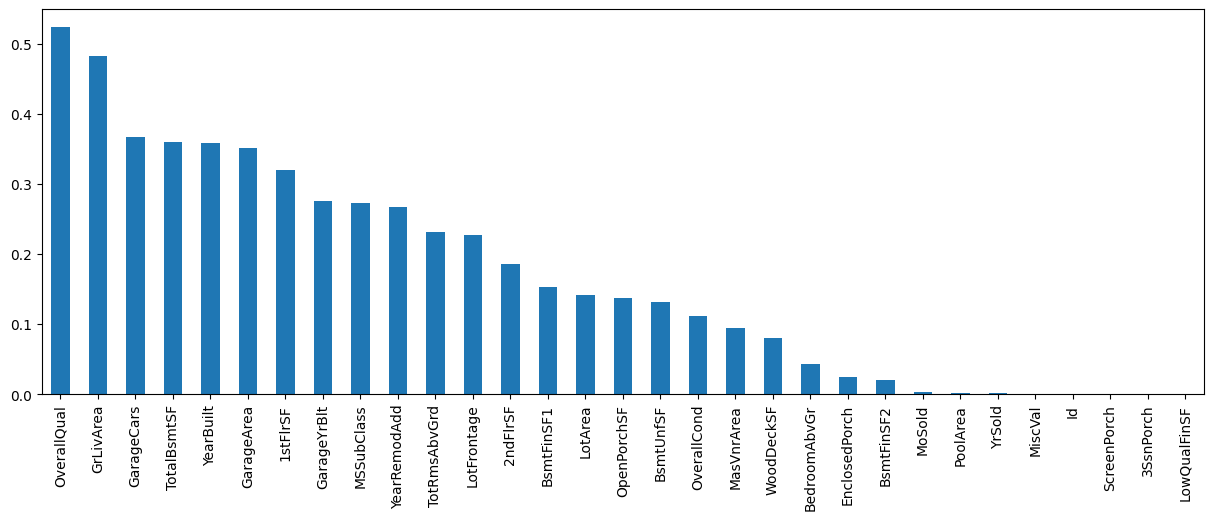

In [13]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [14]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 9 important features
sel_five_cols = SelectKBest(mutual_info_regression, k=9)
sel_five_cols.fit(X_train, y_train)
selected_features = X_train.columns[sel_five_cols.get_support()]
selected_features

Index(['MSSubClass', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'GarageYrBlt', 'GarageCars', 'GarageArea'],
      dtype='object')

### Training Model

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [16]:
# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)



In [17]:
r2_score = rf_regressor.score(X_test, y_test)
print("R-squared:", r2_score)

R-squared: 0.844188219347245


In [18]:
df_pred = pd.DataFrame(
    {"y_test" : y_test,
    "y_pred" : y_pred_test}
)

In [19]:
df_pred.head(20)

,y_test,y_pred
1134,169000,177944.02
298,175000,172074.82
745,299800,303779.04
1009,102000,125559.30
713,129000,131419.00
1138,196000,177324.98
9,118000,118106.65
918,238000,249175.60
798,485000,481934.14
984,126000,133302.36


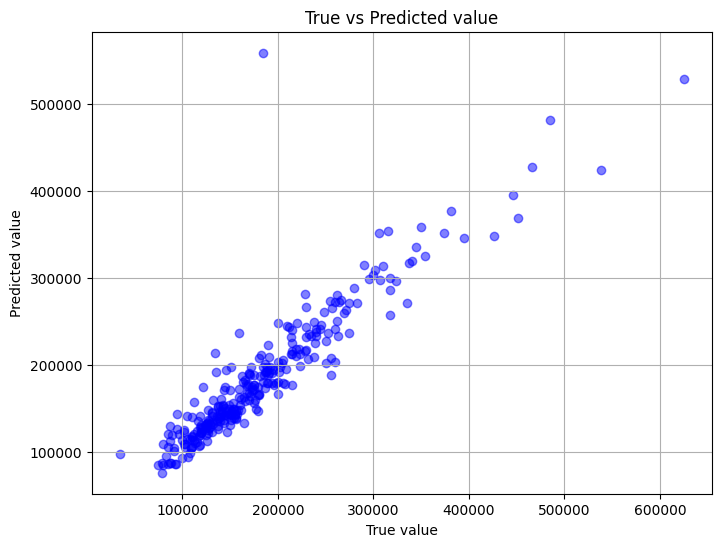

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title('True vs Predicted value')
plt.grid(True)
plt.show()

In [21]:
print(f"train_mse:{train_mse}\ntest_mse:{test_mse}")

train_mse:147956428.11783287
test_mse:1032611396.2450933
